In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/crimes.csv')

In [ ]:
df.shape

(568293, 10)

In [ ]:
df.head(2).T

,0,1
dt,2018-01-01,2018-04-01
region,אילת,אילת
police_district,מחוז דרומי,מחוז דרומי
police_merhav,מרחב אילת דרום,מרחב אילת דרום
police_station,מרחב אילת דרום,מרחב אילת דרום
crime_group,NaN,NaN
crime_type,NaN,NaN
tikim_sum,199,301
social_rank,6,6
population,52285,52285


In [ ]:
df['region'].nunique()

163

In [ ]:
df['dt'].min(), df['dt'].max()

('2018-01-01', '2023-01-01')

In [37]:
df.groupby('police_district').size().reset_index(name='count').sort_values(by=['count'], ascending=False)

,police_district,count
6,מחוז תא,141565
3,מחוז מרכז,121481
0,מחוז דרומי,100849
1,מחוז חוף,77072
2,מחוז ירושלים,72124
4,מחוז צפון,43353
5,מחוז שי,11849


In [ ]:
df['police_station'].nunique()

85

In [36]:
df.groupby('police_merhav').size().reset_index(name='count').sort_values(by=['count'], ascending=False)

,police_merhav,count
18,מרחב שרון,66707
0,מרחב איילון החדש תא,61276
17,מרחב שפלה,54774
14,מרחב ציון ירושלים,51679
10,מרחב לכיש,48062
7,מרחב ירקון תא,45901
12,מרחב נגב,45780
5,מרחב דן תא,34388
2,מרחב אשר חוף,32079
9,מרחב כרמל חוף,27788


In [35]:
df.groupby('crime_group').size().reset_index(name='count').sort_values(by=['count'], ascending=False)

,crime_group,count
4,עבירות כלפי הרכוש,193321
10,עבירות סדר ציבורי,166359
9,עבירות נגד גוף,57405
3,עבירות כלפי המוסר,51250
7,עבירות מרמה,44219
13,קבוצת כל השאר,19824
12,עבירות תנועה,7280
2,עבירות כלכליות,5745
5,עבירות מין,5285
1,עבירות בטחון,4906


In [34]:
df.groupby('crime_type').size().reset_index(name='count').sort_values(by=['count'], ascending=False)

,crime_type,count
15,איומים,35734
24,גניבות אחרות,33715
30,גרימת נזק לרכוש בזדון,32284
1,(תקיפה (למעט עובדי ציבור,31829
118,עבירות נגד הסדר הצבורי,26733
...,...,...
29,גרימת מות ברשלנות - ת.ד.,2
63,חוסר תאורה,2
52,התנהגות הולכי רגל,2
7,אי ציות לחיצי נתיבים,1


In [46]:
df.groupby('social_rank').size().reset_index(name='count').sort_values(by=['count'], ascending=False)

,social_rank,count
6,7,129140
4,5,120467
7,8,112122
1,2,81862
5,6,56353
3,4,28095
8,9,18640
2,3,12163
0,1,9451


In [46]:
df.groupby('social_rank').size().reset_index(name='count').sort_values(by=['count'], ascending=False)

In [48]:
%%capture
!pip install joypy

In [49]:
from joypy import joyplot

In [55]:
to_plot = df.groupby(['region','social_rank'], as_index=False)['tikim_sum'].sum()
to_plot

,region,social_rank,tikim_sum
0,אבו סנאן,3,1808
1,אבן יהודה,9,1854
2,אום אל פחם,2,7574
3,אופקים,3,7495
4,אור יהודה,5,8678
...,...,...,...
158,שוהם,9,1668
159,שפרעם,3,8130
160,תל אביב יפו,8,196127
161,תל מונד,9,1866


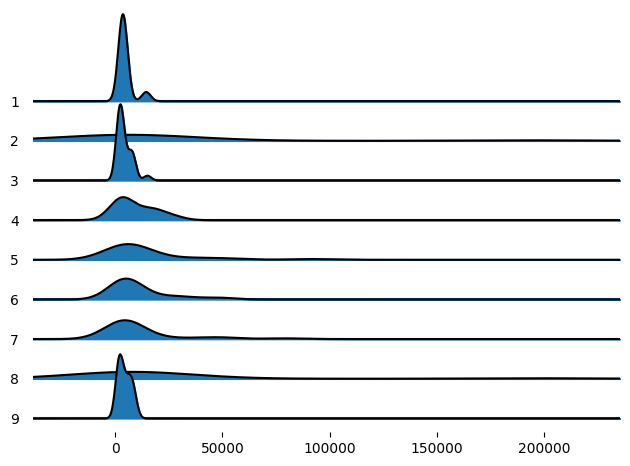

In [61]:
joyplot(data=to_plot,by='social_rank',column='tikim_sum');

In [71]:
to_plot = df.groupby(['region','social_rank'], as_index=False).apply(
    lambda gp: gp['tikim_sum'].sum() / gp['population'].max()).rename(columns={None: 'tikim_norm'})
to_plot

<ipython-input-71-948cd8c5b334>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  to_plot = df.groupby(['region','social_rank'], as_index=False).apply(


,region,social_rank,tikim_norm
0,אבו סנאן,3,0.128245
1,אבן יהודה,9,0.135062
2,אום אל פחם,2,0.134990
3,אופקים,3,0.244439
4,אור יהודה,5,0.236464
...,...,...,...
158,שוהם,9,0.079259
159,שפרעם,3,0.193548
160,תל אביב יפו,8,0.426606
161,תל מונד,9,0.141966


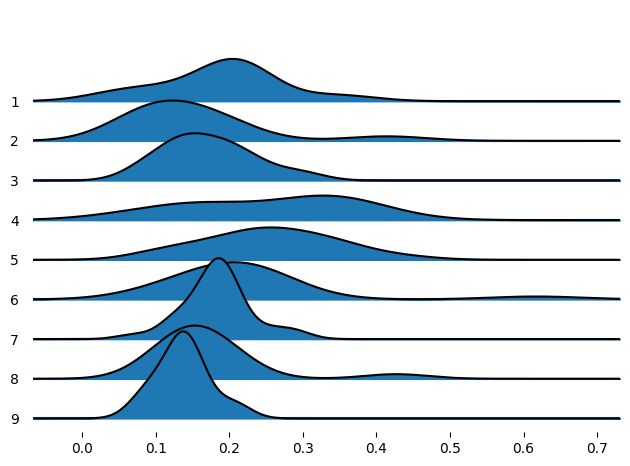

In [72]:
joyplot(data=to_plot,by='social_rank',column='tikim_norm');

In [74]:
# Because the plot in social_rank=1,2,3 are wierd let's check where there are all the Nan
df.isna().sum()

,0
dt,0
region,0
police_district,0
police_merhav,0
police_station,0
crime_group,3927
crime_type,3927
tikim_sum,0
social_rank,0
population,0


In [76]:
# Checking if all the Nan are at the same rows
(df['crime_group'].isna()==df['crime_type'].isna()).all()

np.True_

<ipython-input-89-81246b1688da>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  to_plot = df.groupby('region').apply(


<Axes: ylabel='Frequency'>

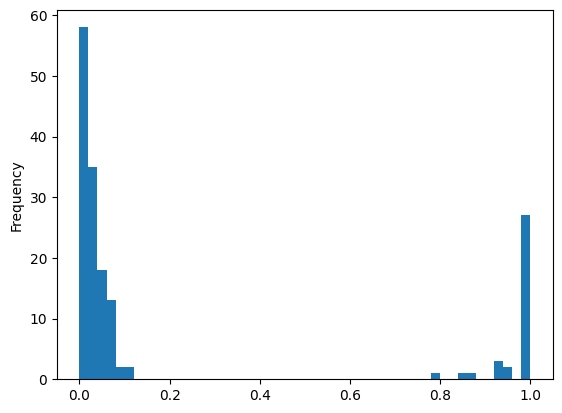

In [89]:
# Checking if there are specific cities which are problematic
to_plot = df.groupby('region').apply(
    lambda gp: gp[gp['crime_group'].isna()]['tikim_sum'].sum()/ gp['tikim_sum'].sum())
to_plot.plot.hist(bins=50)

In [92]:
df = df.groupby('region').filter(
    lambda gp: gp[gp['crime_group'].isna()]['tikim_sum'].sum()/ gp['tikim_sum'].sum() <0.6)

In [93]:
to_plot = df.groupby(['region','social_rank'], as_index=False).apply(
    lambda gp: gp['tikim_sum'].sum() / gp['population'].max()).rename(columns={None: 'tikim_norm'})
to_plot

<ipython-input-93-948cd8c5b334>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  to_plot = df.groupby(['region','social_rank'], as_index=False).apply(


,region,social_rank,tikim_norm
0,אבן יהודה,9,0.135062
1,אופקים,3,0.244439
2,אור יהודה,5,0.236464
3,אור עקיבא,5,0.264549
4,אזור,7,0.182343
...,...,...,...
123,שגב שלום,1,0.348939
124,שדרות,5,0.361670
125,שוהם,9,0.079259
126,תל אביב יפו,8,0.426606


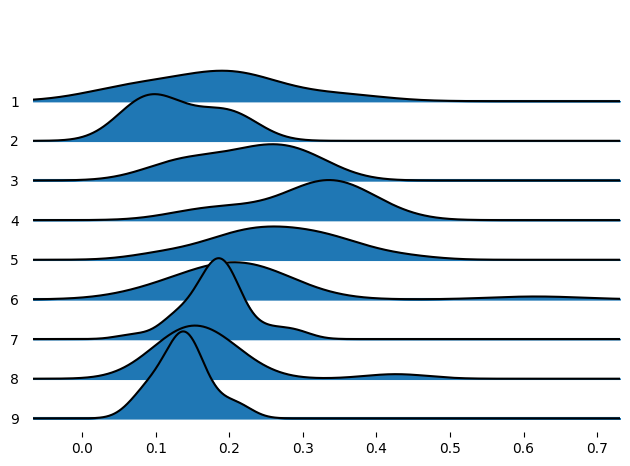

In [95]:
joyplot(to_plot, by='social_rank', column='tikim_norm');

In [97]:
to_plot[to_plot['social_rank']<=3].sort_values('tikim_norm')

,region,social_rank,tikim_norm
53,מודיעין עילית,1,0.046653
118,רכסים,2,0.078042
15,ביתר עילית,1,0.083757
6,אלעד,2,0.084147
16,בני ברק,2,0.098156
51,מג'דל שמס,3,0.121299
43,כסיפה,1,0.136968
14,בית שמש,2,0.137902
42,כאבול,3,0.158709
33,חורה,1,0.181358


In [99]:
df_train = df.groupby(['region','crime_type','social_rank'], as_index=False).apply(
    lambda gp: gp['tikim_sum'].sum() / gp['population'].max()).rename(columns={None: 'tikim_norm'})
df_train

<ipython-input-99-411a42caf817>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train = df.groupby(['region','crime_type','social_rank'], as_index=False).apply(


,region,crime_type,social_rank,tikim_norm
0,אבן יהודה,(תקיפה (למעט עובדי ציבור,9,0.012239
1,אבן יהודה,איומים,9,0.018358
2,אבן יהודה,"גידול,ייצור והפקת-סמים",9,0.000364
3,אבן יהודה,גניבה מתוך רכב,9,0.004517
4,אבן יהודה,"גניבה ע""י עובדים וסוכנים",9,0.000073
...,...,...,...,...
9743,תל מונד,שוחד,9,0.000076
9744,תל מונד,שמוש בסמים מסוכנים,9,0.005250
9745,תל מונד,תקיפה לשם גניבה,9,0.000076
9746,תל מונד,תקיפת והכשלת שוטר,9,0.001826


In [107]:
from scipy.stats import spearmanr
ans=[]
for crime in df_train['crime_type'].unique():
  df_crime = df_train[df_train['crime_type']==crime]
  if len(df_crime) < 10:
    continue
  spearman, pval = spearmanr(df_crime['social_rank'], df_crime['tikim_norm'])
  ans.append({'crime_type':crime, 'spearman':spearman, 'pval':pval})

In [111]:
alpha = 0.05

ans = pd.DataFrame(ans).sort_values('pval')
ans = ans[ans['pval']<alpha/len(ans)]
ans

,crime_type,spearman,pval
16,התפרצות לבית דירה,0.612905,1.478722e-14
26,סטיסטי כל השאר,-0.599270,7.836588e-14
73,תקיפת שוטר בנסיבות חמורות,-0.633580,1.427418e-13
19,חבלה גופנית חמורה,-0.585154,4.061729e-13
15,הצתה,-0.523749,2.640501e-10
48,תקיפת והכשלת שוטר,-0.519593,3.286100e-10
35,עבירות נגד הסדר הצבורי,-0.518107,3.763584e-10
41,קטטות והפרעות ברחובות,-0.485683,7.130262e-09
5,גניבה שמוש רכב ללא רשות,0.452073,8.474866e-08
24,סחיטה,-0.445226,1.395729e-07


<Axes: xlabel='social_rank', ylabel='tikim_norm'>

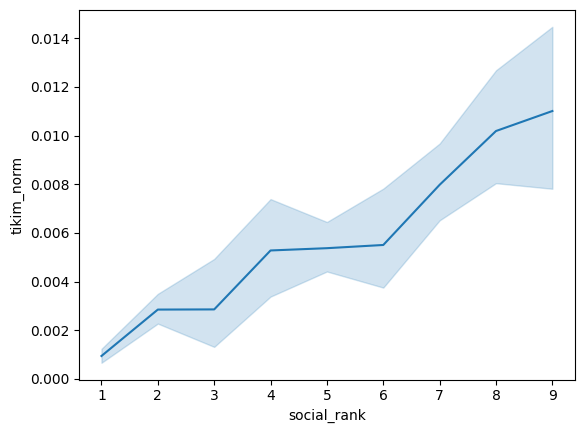

In [114]:
# The first line ('התפרצות לבית דירה') has positive spearman due to crimes that are againt the citizens.
# I want to remove the crime from the list due to that
import seaborn as sns
df_crime = df_train[df_train['crime_type']=='התפרצות לבית דירה']
sns.lineplot(x=df_crime['social_rank'],y=df_crime['tikim_norm'])